In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import xarray as xr
import numpy as np
import pandas as pd

import ecephys_analyses as ea 
from ecephys.plot import plot_hypnogram_overlay

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

In [8]:
from ecephys.signal.xarray_utils import add_states_to_dataset

In [4]:
xr.set_options(keep_attrs=True)

In [164]:
subjects = ["Segundo", "Valentino", "Doppio", "Alessandro", "Allan"]
experiment = 'novel_objects_deprivation'
condition = 'light-period-circadian-match'
max_freq = 20

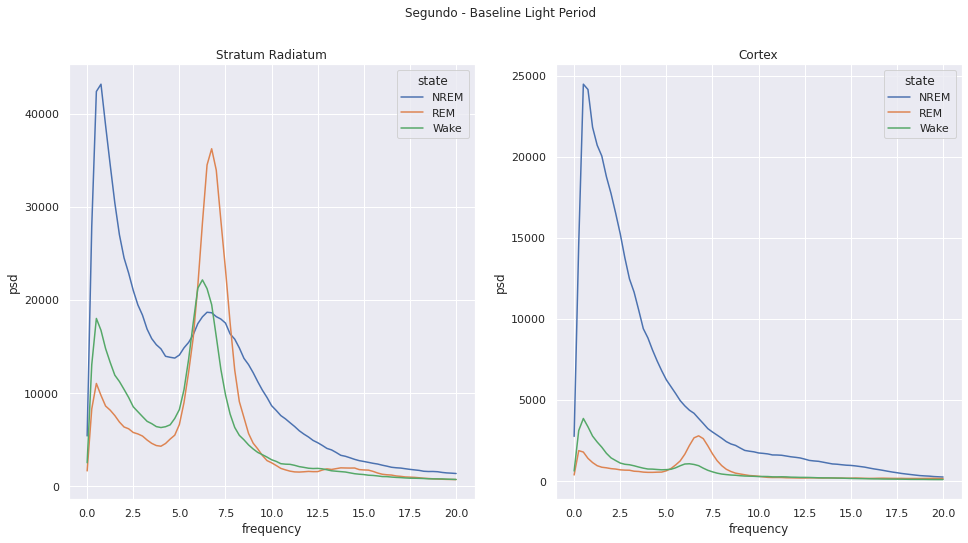

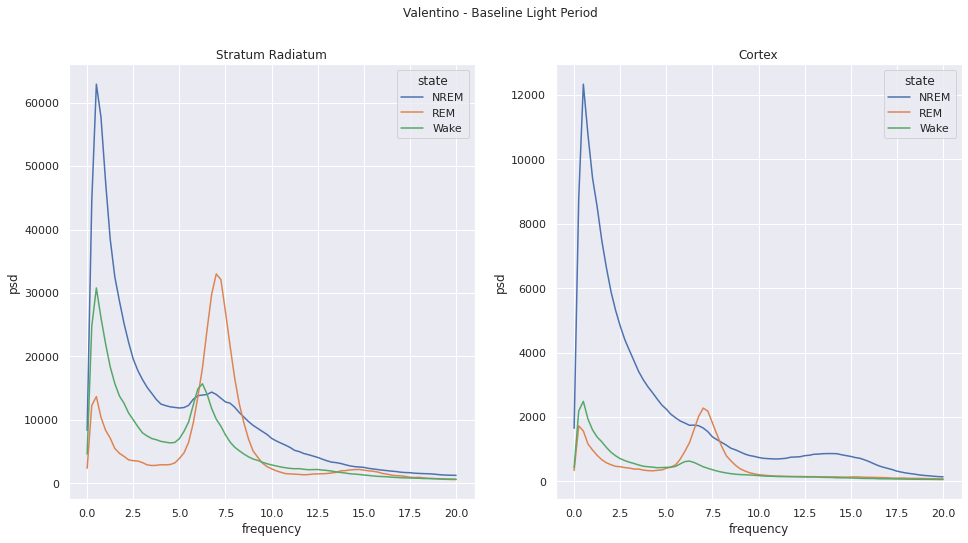

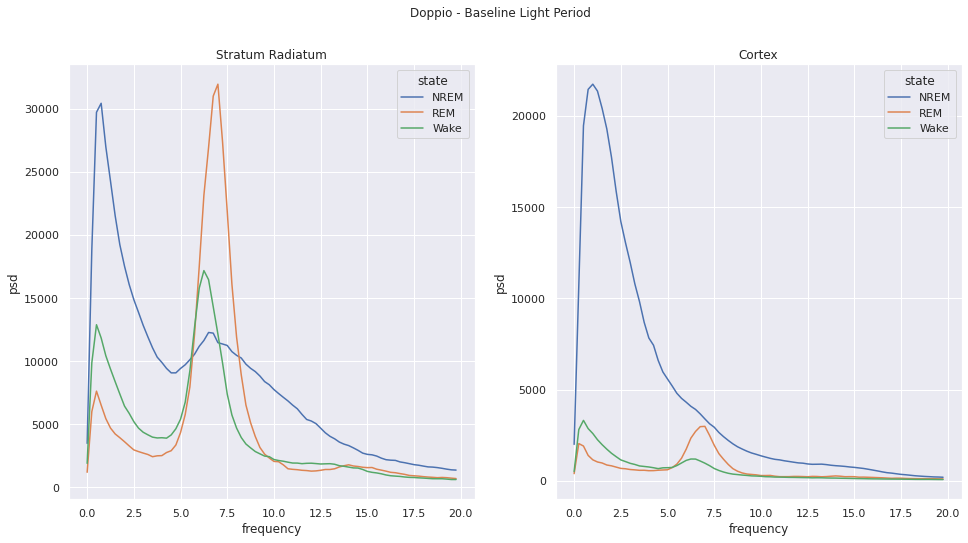

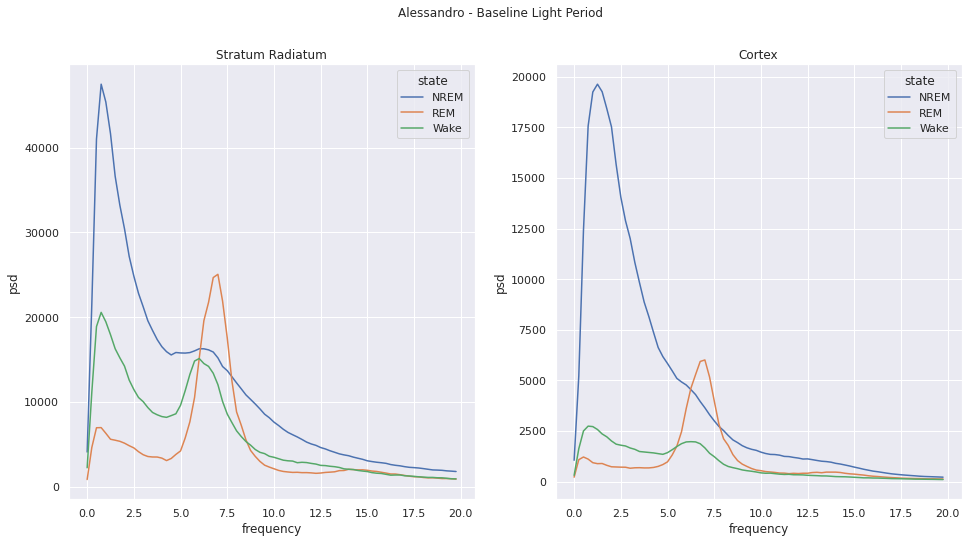

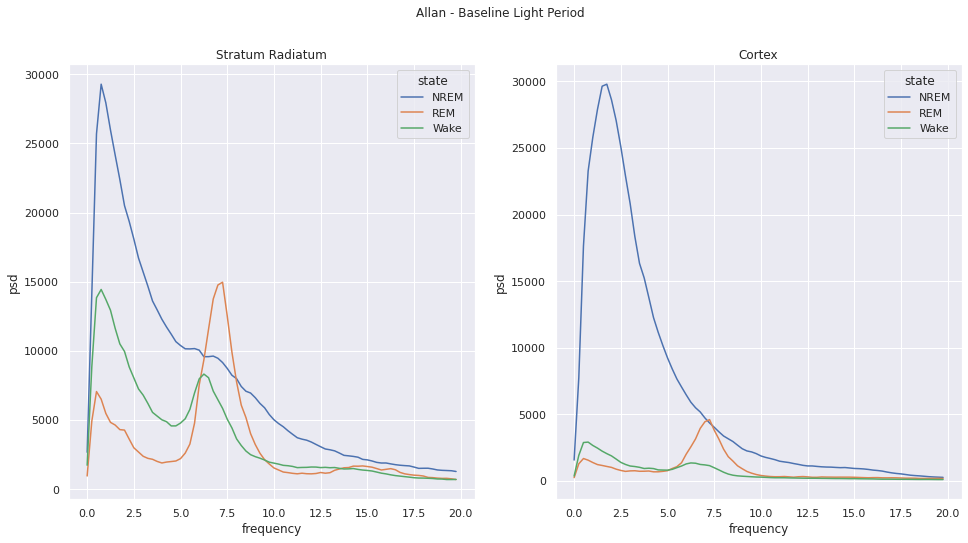

In [172]:
for subject in subjects:
    hyp = ea.load_hypnogram(subject, experiment, condition)
    spg = ea.load_spectrogram(subject, experiment, condition).sel(frequency=slice(0, max_freq))
    spg = add_states_to_dataset(spg, hyp)
    spg['state'] = spg.state.str.replace('N\d{1}', 'NREM')
    spg = spg.where(spg.state.isin(['NREM', 'REM', 'Wake']), drop=True)
    psd = spg.groupby('state').mean(dim='time')
    df = psd.to_dataframe()
    
    fig, axes = plt.subplots(1, 2, figsize=(16, 8))
    fig.suptitle(f"{subject} - Baseline Light Period")
    
    g = sns.lineplot(data=df, x='frequency',  y='sr_wm_ref', hue='state', ax=axes[0])
    g.set(ylabel='psd', title='Stratum Radiatum')

    g = sns.lineplot(data=df, x='frequency',  y='mpta_wm_ref', hue='state', ax=axes[1])
    g.set(ylabel='psd', title='Cortex')

In [162]:
#df = df.melt(ignore_index=False, var_name='region', value_name='psd')
#g = sns.relplot(data=df, col='region', x='frequency', y='psd', hue='state', kind='line', aspect=2, height=8)

[Text(0, 0.5, 'psd'), Text(0.5, 1.0, 'Cortex'), None, None]

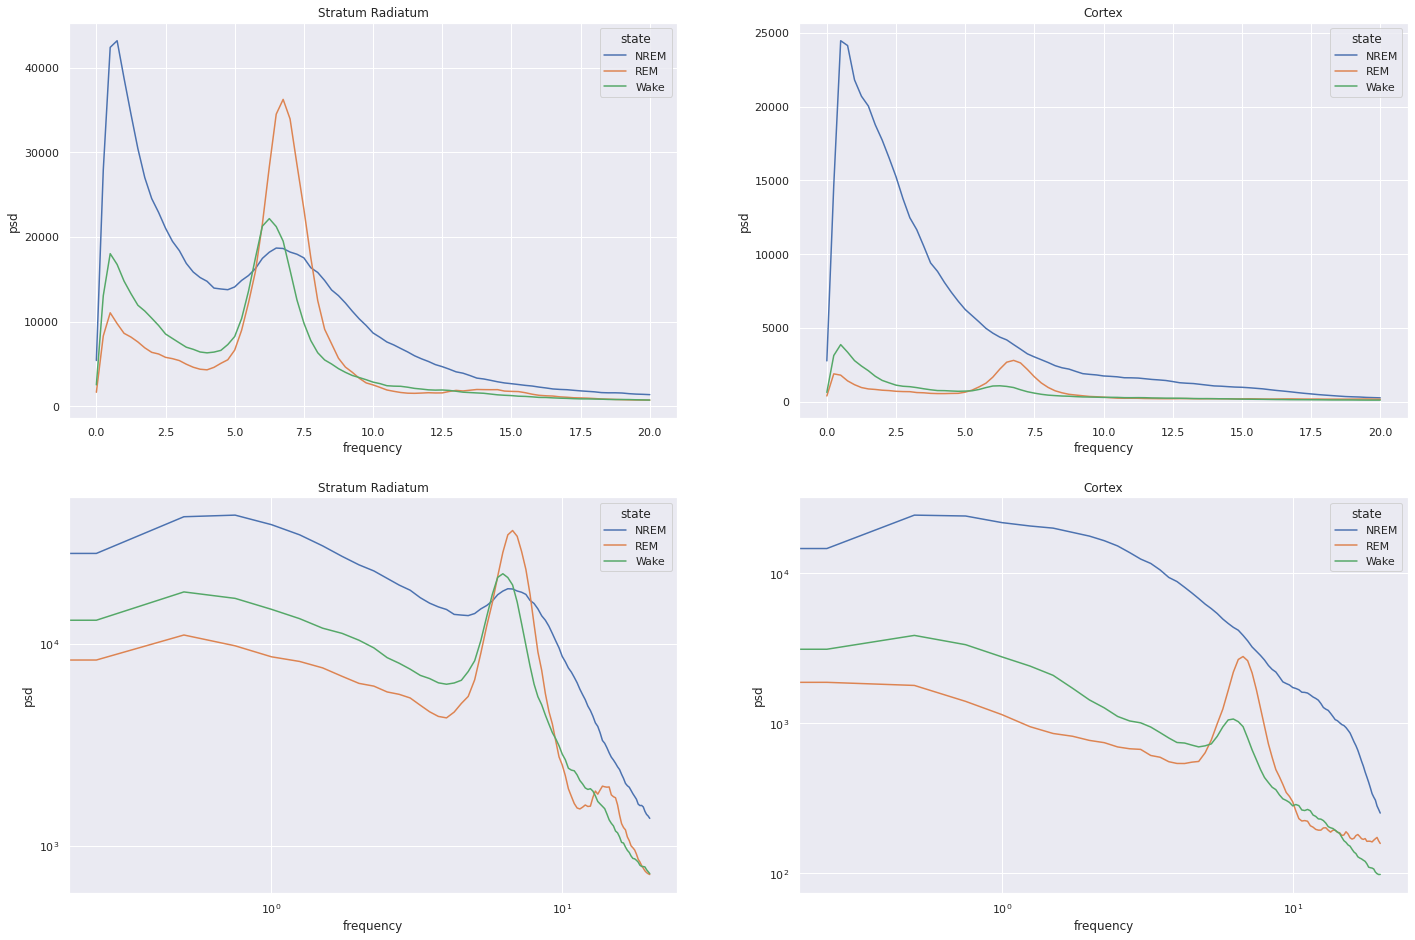

In [163]:
fig, axes = plt.subplots(2, 2, figsize=(24, 16))
g = sns.lineplot(data=df, x='frequency',  y='sr_wm_ref', hue='state', ax=axes[0][0])
g.set(ylabel='psd', title='Stratum Radiatum')

g = sns.lineplot(data=df, x='frequency',  y='mpta_wm_ref', hue='state', ax=axes[0][1])
g.set(ylabel='psd', title='Cortex')

g = sns.lineplot(data=df, x='frequency',  y='sr_wm_ref', hue='state', ax=axes[1][0])
g.set(ylabel='psd', title='Stratum Radiatum', xscale='log', yscale='log')

g = sns.lineplot(data=df, x='frequency',  y='mpta_wm_ref', hue='state', ax=axes[1][1])
g.set(ylabel='psd', title='Cortex', xscale='log', yscale='log')